In [1]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
all_files=glob.glob('텍스트빈도분석(영문)/myCabinetExcelData*.xls')
all_files

['텍스트빈도분석(영문)\\myCabinetExcelData (1).xls',
 '텍스트빈도분석(영문)\\myCabinetExcelData (2).xls',
 '텍스트빈도분석(영문)\\myCabinetExcelData (3).xls',
 '텍스트빈도분석(영문)\\myCabinetExcelData (4).xls',
 '텍스트빈도분석(영문)\\myCabinetExcelData (5).xls',
 '텍스트빈도분석(영문)\\myCabinetExcelData (6).xls',
 '텍스트빈도분석(영문)\\myCabinetExcelData (7).xls',
 '텍스트빈도분석(영문)\\myCabinetExcelData (8).xls',
 '텍스트빈도분석(영문)\\myCabinetExcelData (9).xls',
 '텍스트빈도분석(영문)\\myCabinetExcelData.xls']

In [3]:
all_files_data=[]
for file in all_files:
    data_frame=pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big Data Based Security Analytics for Protecti...,"Win, T. Y.; Tianfield, H.; Mair, Q.",unknown,2018
1,NaN,2,"Deep Learning on Big, Sparse, Behavioral Data","De Cnudde, Sofie; Ramon, Yanou; Martens, David...",Mary Ann Leibert,2019
2,NaN,3,Using Big Data to Understand the Human Conditi...,unknown,Mary Ann Leibert,2015
3,NaN,4,"Interview with Dr. Silvio Carta, Author of the...","Carta, Silvio",Mary Ann Leibert,2019
4,NaN,5,Call for Special Issue Papers: Big Data in Bus...,"Nobanee, Haitham",Mary Ann Leibert,2019
...,...,...,...,...,...,...
95,NaN,96,A platform for big data analytics on distribut...,"Aye, Kyar Nyo; Thein, Thandar",Inderscience,2015
96,NaN,97,Towards quality-of-service driven consistency ...,"García-Recuero, Álvaro; Esteves, Sérgio; Veiga...",Inderscience,2014
97,NaN,98,Toward Efficient and Flexible Metadata Indexin...,"Zhao, D.; Qiao, K.; Zhou, Z.; Li, T.; Lu, Z.; ...",unknown,2017
98,NaN,99,A review on ethical concerns in big data manag...,"Nair, Suja R.",Inderscience,2020


In [4]:
all_files_data_concat=pd.concat(all_files_data, axis=0, ignore_index=True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big Data Based Security Analytics for Protecti...,"Win, T. Y.; Tianfield, H.; Mair, Q.",unknown,2018
1,NaN,2,"Deep Learning on Big, Sparse, Behavioral Data","De Cnudde, Sofie; Ramon, Yanou; Martens, David...",Mary Ann Leibert,2019
2,NaN,3,Using Big Data to Understand the Human Conditi...,unknown,Mary Ann Leibert,2015
3,NaN,4,"Interview with Dr. Silvio Carta, Author of the...","Carta, Silvio",Mary Ann Leibert,2019
4,NaN,5,Call for Special Issue Papers: Big Data in Bus...,"Nobanee, Haitham",Mary Ann Leibert,2019
...,...,...,...,...,...,...
995,NaN,96,Big uncertain data of multiple sensors efficie...,"Jafari, Hossein; Li, Xiangfang; Qian, Lijun; A...",Inderscience,2018
996,NaN,97,Why Big Data = Big Deal,unknown,Mary Ann Leibert,2014
997,NaN,98,The Uses of Big Data in Cities,unknown,Mary Ann Leibert,2014
998,NaN,99,Big Data on Robotics,unknown,Mary Ann Leibert,2016


In [5]:
all_files_data_concat.to_csv('텍스트빈도분석(영문)/riss_bigdata.csv', encoding='utf-8', index=False)

In [6]:
all_title=all_files_data_concat['제목']
all_title

0      Big Data Based Security Analytics for Protecti...
1          Deep Learning on Big, Sparse, Behavioral Data
2      Using Big Data to Understand the Human Conditi...
3      Interview with Dr. Silvio Carta, Author of the...
4      Call for Special Issue Papers: Big Data in Bus...
                             ...                        
995    Big uncertain data of multiple sensors efficie...
996                              Why Big Data = Big Deal
997                       The Uses of Big Data in Cities
998                                 Big Data on Robotics
999    Call for Special Issue Papers: Programming Mod...
Name: 제목, Length: 1000, dtype: object

In [7]:
stopWords=set(stopwords.words("english"))
lemma=WordNetLemmatizer()

In [8]:
words=[]  

for title in all_title:
    EnWords=re.sub(r"[^a-zA-Z]+", " ", str(title))    
    EnWordsToken=word_tokenize(EnWords.lower())
    EnWordsTokenStop=[w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma=[lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [9]:
print(words)

[['big', 'data', 'based', 'security', 'analytics', 'protecting', 'virtualized', 'infrastructure', 'cloud', 'computing'], ['deep', 'learning', 'big', 'sparse', 'behavioral', 'data'], ['using', 'big', 'data', 'understand', 'human', 'condition', 'kavli', 'human', 'project'], ['interview', 'dr', 'silvio', 'carta', 'author', 'book', 'big', 'data', 'code', 'discrete', 'city', 'routledge'], ['call', 'special', 'issue', 'paper', 'big', 'data', 'business'], ['ensemble', 'based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework'], ['stgi', 'spatio', 'temporal', 'grid', 'index', 'model', 'marine', 'big', 'data'], ['research', 'dilemma', 'behavioral', 'big', 'data'], ['monkeyking', 'adaptive', 'parameter', 'tuning', 'big', 'data', 'platform', 'deep', 'reinforcement', 'learning'], ['call', 'paper', 'special', 'issue', 'big', 'data', 'robotics'], ['unsupervised', 'tensor', 'mining', 'big', 'data', 'practitioner'], ['call', 'special', 'issue', 'paper', 'big', 'scie

In [10]:
words2=list(reduce(lambda x, y: x+y,words))
print(words2)

['big', 'data', 'based', 'security', 'analytics', 'protecting', 'virtualized', 'infrastructure', 'cloud', 'computing', 'deep', 'learning', 'big', 'sparse', 'behavioral', 'data', 'using', 'big', 'data', 'understand', 'human', 'condition', 'kavli', 'human', 'project', 'interview', 'dr', 'silvio', 'carta', 'author', 'book', 'big', 'data', 'code', 'discrete', 'city', 'routledge', 'call', 'special', 'issue', 'paper', 'big', 'data', 'business', 'ensemble', 'based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework', 'stgi', 'spatio', 'temporal', 'grid', 'index', 'model', 'marine', 'big', 'data', 'research', 'dilemma', 'behavioral', 'big', 'data', 'monkeyking', 'adaptive', 'parameter', 'tuning', 'big', 'data', 'platform', 'deep', 'reinforcement', 'learning', 'call', 'paper', 'special', 'issue', 'big', 'data', 'robotics', 'unsupervised', 'tensor', 'mining', 'big', 'data', 'practitioner', 'call', 'special', 'issue', 'paper', 'big', 'scientific', 'data', 'machi

In [11]:
count=Counter(words2)

count

Counter({'data': 1233,
         'big': 1114,
         'analytics': 122,
         'based': 109,
         'analysis': 102,
         'driven': 74,
         'system': 69,
         'approach': 59,
         'using': 56,
         'issue': 48,
         'model': 47,
         'learning': 43,
         'application': 41,
         'challenge': 39,
         'special': 38,
         'new': 37,
         'framework': 36,
         'platform': 36,
         'science': 36,
         'management': 36,
         'paper': 34,
         'health': 34,
         'algorithm': 34,
         'era': 34,
         'call': 33,
         'cloud': 31,
         'research': 31,
         'network': 29,
         'performance': 27,
         'processing': 27,
         'smart': 26,
         'service': 26,
         'computing': 25,
         'mining': 25,
         'opportunity': 25,
         'technology': 25,
         'business': 24,
         'method': 24,
         'earth': 24,
         'study': 23,
         'intelligence': 23,
        

In [12]:
word_count=dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag]=counts
        print("%s : %d" % (tag,counts))

data : 1233
big : 1114
analytics : 122
based : 109
analysis : 102
driven : 74
system : 69
approach : 59
using : 56
issue : 48
model : 47
learning : 43
application : 41
challenge : 39
special : 38
new : 37
framework : 36
platform : 36
science : 36
management : 36
paper : 34
health : 34
algorithm : 34
era : 34
call : 33
cloud : 31
research : 31
network : 29
performance : 27
processing : 27
smart : 26
service : 26
computing : 25
mining : 25
opportunity : 25
technology : 25
business : 24
method : 24
earth : 24
study : 23
intelligence : 23
world : 23
machine : 22
perspective : 22
distributed : 22
real : 22
information : 22
process : 21
development : 21
use : 21


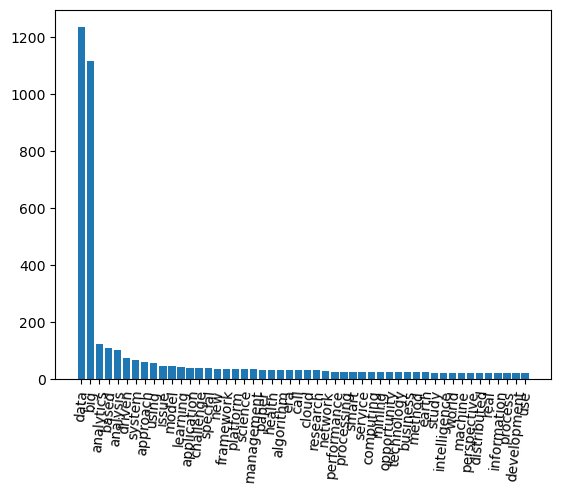

In [13]:
sorted_Keys=sorted(word_count, key=word_count.get, reverse=True)
sorted_Values=sorted(word_count.values(), reverse=True)
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=85)
plt.show()

In [14]:
word_count=dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag]=counts
        print("%s : %d" % (tag,counts))

data : 1233
big : 1114
analytics : 122
based : 109
analysis : 102
driven : 74
system : 69
approach : 59
using : 56
issue : 48
model : 47
learning : 43
application : 41
challenge : 39
special : 38
new : 37
framework : 36
platform : 36
science : 36
management : 36
paper : 34
health : 34
algorithm : 34
era : 34
call : 33
cloud : 31
research : 31
network : 29
performance : 27
processing : 27
smart : 26
service : 26
computing : 25
mining : 25
opportunity : 25
technology : 25
business : 24
method : 24
earth : 24
study : 23
intelligence : 23
world : 23
machine : 22
perspective : 22
distributed : 22
real : 22
information : 22
process : 21
development : 21
use : 21


In [15]:
del word_count['big']
del word_count['data']

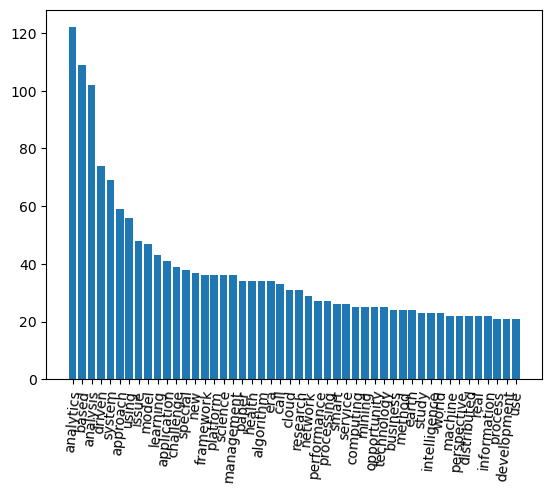

In [16]:
sorted_Keys=sorted(word_count, key=word_count.get, reverse=True)
sorted_Values=sorted(word_count.values(), reverse=True)
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=85)
plt.show()

In [17]:
all_files_data_concat['doc_count']=0
summary_year=all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1999,1
1,2003,1
2,2004,1
3,2011,2
4,2012,15
5,2013,48
6,2014,109
7,2015,90
8,2016,116
9,2017,127


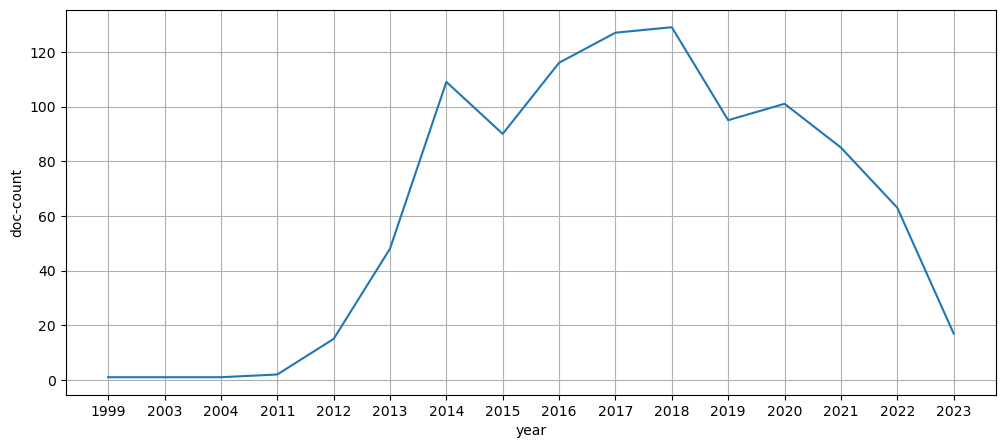

In [18]:
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

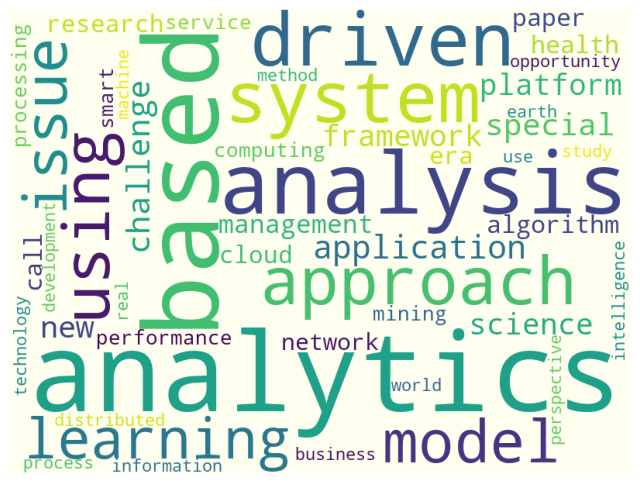

In [19]:
stopwords=set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [20]:
word_count=dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag]=counts
        print("%s : %d" % (tag,counts))

data : 1233
big : 1114
analytics : 122
based : 109
analysis : 102
driven : 74
system : 69
approach : 59
using : 56
issue : 48
model : 47
learning : 43
application : 41
challenge : 39
special : 38
new : 37
framework : 36
platform : 36
science : 36
management : 36
paper : 34
health : 34
algorithm : 34
era : 34
call : 33
cloud : 31
research : 31
network : 29
performance : 27
processing : 27
smart : 26
service : 26
computing : 25
mining : 25
opportunity : 25
technology : 25
business : 24
method : 24
earth : 24
study : 23
intelligence : 23
world : 23
machine : 22
perspective : 22
distributed : 22
real : 22
information : 22
process : 21
development : 21
use : 21


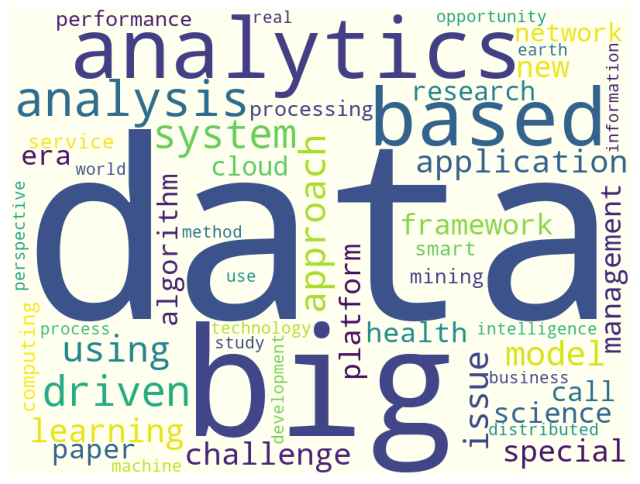

In [21]:
stopwords=set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [22]:
cloud.to_file("텍스트빈도분석(영문)/riss_bigdata_wordCloud.jpg")